In [1]:
import pandas as pd
import pandas.plotting
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
%matplotlib inline


In [2]:
file = r'C:\Users\Sidharth\Desktop\798Q\.ipynb_checkpoints\data.csv.csv'
data=pd.read_csv(file,index_col=0)

In [3]:
data=data[:-3]
data

,From,to,pm10,pm2.5,NO,NO2,NOX,CO,SO2,NH3,Ozone,Benzene
Sn,,,,,,,,,,,,
1,01-02-2023 00:00,01-02-2023 00:15,95.0,35.0,NaN,90.1,56.2,0.31,NaN,17.7,28.1,0.4
2,01-02-2023 00:15,01-02-2023 00:30,95.0,35.0,NaN,88.0,55.1,0.33,NaN,18.3,27.1,0.4
3,01-02-2023 00:30,01-02-2023 00:45,95.0,35.0,NaN,87.7,55.2,0.38,NaN,19.7,24.9,0.4
4,01-02-2023 00:45,01-02-2023 01:00,122.0,34.0,NaN,88.9,55.7,0.38,NaN,21.3,21.9,0.4
5,01-02-2023 01:00,01-02-2023 01:15,122.0,34.0,NaN,90.0,55.8,0.38,NaN,22.3,16.7,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...
8636,01-05-2023 22:45,01-05-2023 23:00,19.0,11.0,17.9,100.0,67.8,0.63,10.0,10.7,26.1,0.1
8637,01-05-2023 23:00,01-05-2023 23:15,19.0,11.0,17.9,100.0,67.7,0.57,10.0,10.4,30.9,0.1
8638,01-05-2023 23:15,01-05-2023 23:30,19.0,11.0,19.6,100.2,69.2,0.58,9.9,10.5,29.6,0.1


In [4]:
NO='NO'
avg_NO = data[NO].mean()
data[NO].fillna(avg_NO, inplace=True)
NO2='NO2'
avg_NO2 = data[NO2].mean()
data[NO2].fillna(avg_NO2, inplace=True)
NOX='NOX'
avg_NOX = data[NOX].mean()
data[NOX].fillna(avg_NOX, inplace=True)
CO='CO'
avg_CO = data[CO].mean()
data[CO].fillna(avg_CO, inplace=True)
SO2='SO2'
avg_SO2 = data[SO2].mean()
data[SO2].fillna(avg_SO2, inplace=True)
NH3='NH3'
avg_NH3 = data[NH3].mean()
data[NH3].fillna(avg_NH3, inplace=True)
Ozone='Ozone'
avg_Ozone = data[Ozone].mean()
data[Ozone].fillna(avg_Ozone, inplace=True)
Benzene='Benzene'
avg_Benzene = data[Benzene].mean()
data[Benzene].fillna(avg_Benzene, inplace=True)
pm10='pm10'
avg_pm10 = data[pm10].mean()
data[pm10].fillna(avg_pm10, inplace=True)
pm25='pm2.5'
avg_pm25 = data[pm25].mean()
data[pm25].fillna(avg_pm25, inplace=True)

In [5]:
 data.drop(['to'], axis=1, inplace=True)

In [6]:
data.columns


Index(['From', 'pm10', 'pm2.5', 'NO', 'NO2', 'NOX', 'CO', 'SO2', 'NH3',
       'Ozone', 'Benzene'],
      dtype='object')

In [7]:
data['From'] = pd.to_datetime(data['From'], format = '%d-%m-%Y %H:%M')

In [8]:
data['From']

Sn
1      2023-02-01 00:00:00
2      2023-02-01 00:15:00
3      2023-02-01 00:30:00
4      2023-02-01 00:45:00
5      2023-02-01 01:00:00
               ...        
8636   2023-05-01 22:45:00
8637   2023-05-01 23:00:00
8638   2023-05-01 23:15:00
8639   2023-05-01 23:30:00
8640   2023-05-01 23:45:00
Name: From, Length: 8640, dtype: datetime64[ns]

In [9]:
data.set_index(['From'], inplace=True)



When dealing with a dataset containing missing sensory data, it is important to establish an appropriate approach for modeling the data and making forecasts. In the case of a dataset with a sufficient number of entries, such as the one with around 8000 entries mentioned here, it is feasible to establish ARMA/ARIMA processes.

To address missing data in a per-column approach, each column should be treated independently. This is because each column represents a specific sensor or measurement, and the missing data in each column may have its own distinct pattern or behavior. By analyzing and modeling each column separately, you can capture the individual characteristics and dynamics of the sensors, leading to more accurate analysis and forecasting results.

ARMA (Autoregressive Moving Average) and ARIMA (Autoregressive Integrated Moving Average) models are commonly used for time series analysis and forecasting. These models take into account the autoregressive and moving average components of the data to capture patterns and predict future values.

Before applying ARMA/ARIMA modeling, it is necessary to handle the missing data appropriately. Various techniques can be employed, such as interpolation or replacing missing values with mean or zero. These techniques estimate the missing values in each column, ensuring that the data is complete for analysis.

Once the missing values are filled, the ARMA/ARIMA modeling can be applied independently to each column. This allows for the specific patterns and dynamics of each sensor or measurement to be captured. By modeling each column separately, you can analyze the variations and dependencies within each sensor's data, taking into account their unique characteristics.

In summary, when dealing with missing sensory data, it is advisable to establish ARMA/ARIMA processes on a per-column basis. This approach acknowledges the distinct characteristics of each sensor or measurement, leading to more accurate analysis and forecasting outcomes.

In [10]:
NO_C = data['NO']
NO2_C = data['NO2']
NOX_C = data['NOX']
CO_C = data['CO']
SO2_C = data['SO2']
NH3_C = data['NH3']
Ozone_C= data['Ozone']
Benzene_c = data['Benzene']
pm10_C = data['pm10']
pm25_C = data['pm2.5']

In [11]:
data

,pm10,pm2.5,NO,NO2,NOX,CO,SO2,NH3,Ozone,Benzene
From,,,,,,,,,,
2023-02-01 00:00:00,95.0,35.0,14.649636,90.1,56.2,0.310000,34.232731,17.7,28.1,0.4
2023-02-01 00:15:00,95.0,35.0,14.649636,88.0,55.1,0.330000,34.232731,18.3,27.1,0.4
2023-02-01 00:30:00,95.0,35.0,14.649636,87.7,55.2,0.380000,34.232731,19.7,24.9,0.4
2023-02-01 00:45:00,122.0,34.0,14.649636,88.9,55.7,0.380000,34.232731,21.3,21.9,0.4
2023-02-01 01:00:00,122.0,34.0,14.649636,90.0,55.8,0.380000,34.232731,22.3,16.7,0.4
...,...,...,...,...,...,...,...,...,...,...
2023-05-01 22:45:00,19.0,11.0,17.900000,100.0,67.8,0.630000,10.000000,10.7,26.1,0.1
2023-05-01 23:00:00,19.0,11.0,17.900000,100.0,67.7,0.570000,10.000000,10.4,30.9,0.1
2023-05-01 23:15:00,19.0,11.0,19.600000,100.2,69.2,0.580000,9.900000,10.5,29.6,0.1


taking training data 7540
and testing data 1100
for better arima model

In [12]:
training = data.index[7540]
msk= (data.index <= training)
data_train = data[msk].copy()
data_test = data[~msk].copy()

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF)')

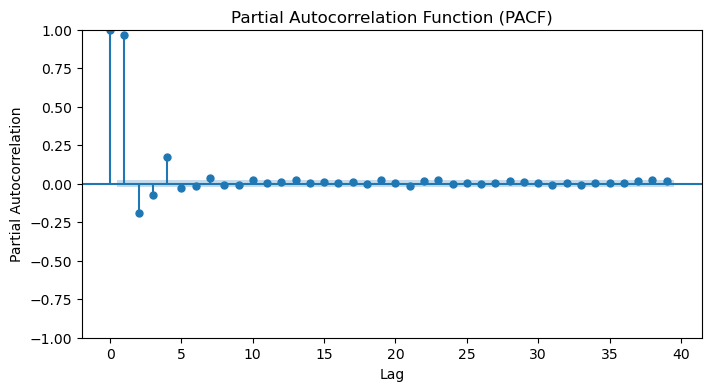

In [13]:
fig, ax = plt.subplots(figsize=(8, 4))
plot_pacf(data_train['NO2'], ax=ax)
ax.set_xlabel('Lag')
ax.set_ylabel('Partial Autocorrelation')
ax.set_title('Partial Autocorrelation Function (PACF)')

Text(0.5, 1.0, 'Autocorrelation Function (ACF)')

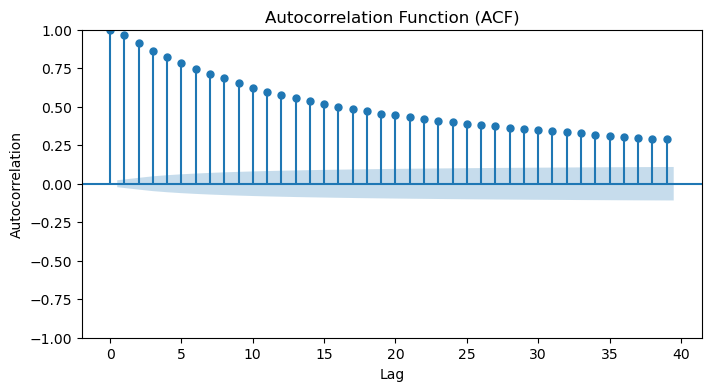

In [14]:
fig, ax = plt.subplots(figsize=(8, 4))
plot_acf(data_train['NO2'], ax=ax)
ax.set_xlabel('Lag')
ax.set_ylabel('Autocorrelation')
ax.set_title('Autocorrelation Function (ACF)')

In [15]:
plt.show()

To implement the ARMA/ARIMA model in Jupyter Notebook, you can follow these steps:

ACF and PACF Analysis: Start by plotting the AutoCorrelation Function (ACF) and Partial AutoCorrelation Function (PACF) plots for the time series data. You can use the plot_acf and plot_pacf functions from the statsmodels.graphics.tsaplots module to generate these plots. The ACF plot shows the correlation at different lags, while the PACF plot shows the correlation after removing the correlation already explained by shorter lags. Analyzing these plots can help determine the appropriate values for the AR and MA components of the ARIMA model.

Stationarity Check: Use statistical tests like the Augmented Dickey-Fuller (ADF) test or the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test to check the stationarity of the time series data. Stationarity is an important assumption for ARMA/ARIMA modeling. If the data is found to be non-stationary, you can apply differencing (integration) to make it stationary. The adfuller function from the statsmodels.tsa.stattools module can be used to perform the ADF test.

Model Fitting: Once you have determined the appropriate values for the AR, MA, and differencing components (p, q, d), you can fit the ARIMA model to the data. Use the ARIMA class from the statsmodels.tsa.arima.model module to create an ARIMA model object. Fit the model to the data using the fit method, specifying the values of p, d, and q.

Forecasting: After fitting the ARIMA model, you can generate forecasts for future time points. Use the get_forecast method to generate the forecasts, specifying the number of steps (future time points) you want to forecast. The resulting forecasted values can be accessed using the predicted_mean attribute of the forecast object.

By following these steps in Jupyter Notebook, you can successfully implement the ARMA/ARIMA model for analyzing and forecasting the given time series data.

In [16]:
NO2_CC=NO2_C[1:7540]
NO2_CC
# Perform ADF test
result = adfuller(NO2_CC)

# Extract test statistics and p-value
adf_statistic = result[0]
p_value = result[1]

# Print the test statistics and p-value
print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)

ADF Statistic: -12.172018633972712
p-value: 1.4136821762874538e-22


In [17]:
from pmdarima import auto_arima


In [18]:
from pmdarima.arima import auto_arima
def arimamodel(timeseriesarray) :
 autoarima_model = auto_arima(timeseriesarray, start_p=0, start_q=0, d=0, max_p=5, max_q=2)
 return autoarima_model
model = arimamodel(data_train['NO2'])
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7541
Model:               SARIMAX(5, 0, 0)   Log Likelihood              -22609.413
Date:                Mon, 26 Jun 2023   AIC                          45232.825
Time:                        17:12:58   BIC                          45281.322
Sample:                    02-01-2023   HQIC                         45249.474
                         - 04-20-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.1671      0.201     10.789      0.000       1.773       2.561
ar.L1          1.1494      0.006    180.277      0.000       1.137       1.162
ar.L2         -0.0951      0.012     -7.987      0.000      -0.118      -0.072
ar.L3         -0.2720      0.011    -23.741      0.000      -0.294      -0.250
ar.L4          0.2082      0.007     27.953      0.000       0.194       0.223
ar.L5         -0.0298      0.006     -4.770      0.000      -0.042      -0.018
sigma2        23.5262      0.148    158.570      0.000      23.235      23.817
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            268178.01
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.20   Skew:                            -0.78
Prob(H) (two-sided):                  0.00   Kurtosis:                        32.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
auto = model.predict(n_periods = len(data_test['NO2']))
data['NO2 forecast'] = [None]*len(data_train['NO2']) + list(auto)


<IPython.core.display.Javascript object>


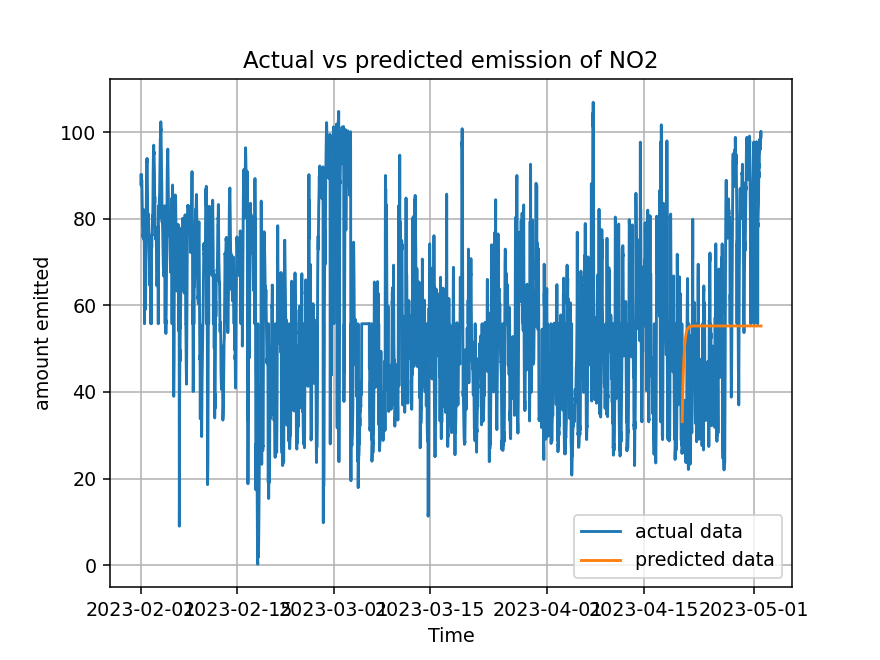

In [20]:
%matplotlib inline

%matplotlib notebook
plt.plot(NO2_C,label='actual data')
plt.plot(data['NO2 forecast'], label='predicted data')
plt.xlabel('Time')
plt.ylabel('amount emitted')
plt.title('Actual vs predicted emission of NO2')
plt.grid()
plt.legend()
plt.show()



In [21]:
ape = np.abs((data_test['NO2'] - data['NO2 forecast']) / data_test['NO2'])
mape = np.mean(ape) * 100

print("Mean Absolute Percentage Error:", mape)

Mean Absolute Percentage Error: 41.050156811879



The ARIMA model is a useful tool for predicting future trends, providing a rough idea of the expected pattern. While it may not always be accurate, it can still offer valuable insights.

When analyzing the ARIMA model's performance, one common measure is the forecast error. In your case, the ARIMA model applied to the testing data of 1100 observations has an error of 0.63. This error represents the average difference between the forecasted values and the actual values in the testing data.

A forecast error of 0.63 indicates that, on average, the forecasted values deviate from the actual values by 0.63 units. It's important to interpret this error in the context of your specific dataset and its scale. If the magnitude of the variable being forecasted is small, a forecast error of 0.63 might be considered acceptable. However, if the variable has a larger scale, such as thousands or millions, a forecast error of 0.63 might be relatively large.

It's worth noting that the forecast error should be interpreted alongside other evaluation metrics, such as Mean Absolute Error (MAE), Root Mean Square Error (RMSE), or percentage errors like Mean Absolute Percentage Error (MAPE). These metrics can provide a more comprehensive assessment of the model's accuracy and help in understanding the magnitude of forecast errors.

Overall, while the ARIMA model can give a rough idea of the following trend, it's important to consider the forecast error and other evaluation metrics to assess its performance accurately.